In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math
from sklearn.linear_model import LinearRegression

n: 10 and sigma: 0.1
Коэффициенты модели: [5.12154209]
Свободный член: -1.0080371117358349
Предсказания:  [1.62713068e-02 9.23504707e+00 1.27030515e+02]

n: 10 and sigma: 1
Коэффициенты модели: [7.25373346]
Свободный член: -1.885846661751204
Предсказания:  [ -0.43509997  12.62162025 179.45748976]

n: 10 and sigma: 3
Коэффициенты модели: [8.82364603]
Свободный член: -2.6604204459068
Предсказания:  [ -0.89569124  14.98687161 217.93073023]

n: 100 and sigma: 0.1
Коэффициенты модели: [5.04141537]
Свободный член: -1.013962926598902
Предсказания:  [-5.67985290e-03  9.06886781e+00  1.25021421e+02]

n: 100 and sigma: 1
Коэффициенты модели: [5.42426643]
Свободный член: -1.1631936945833887
Предсказания:  [-7.83404082e-02  9.68533917e+00  1.34443467e+02]

n: 100 and sigma: 3
Коэффициенты модели: [4.81618001]
Свободный член: -0.6670080122463777
Предсказания:  [  0.29622799   8.96535201 119.73749232]

n: 1000 and sigma: 0.1
Коэффициенты модели: [5.01264274]
Свободный член: -1.007025144895464
Предск

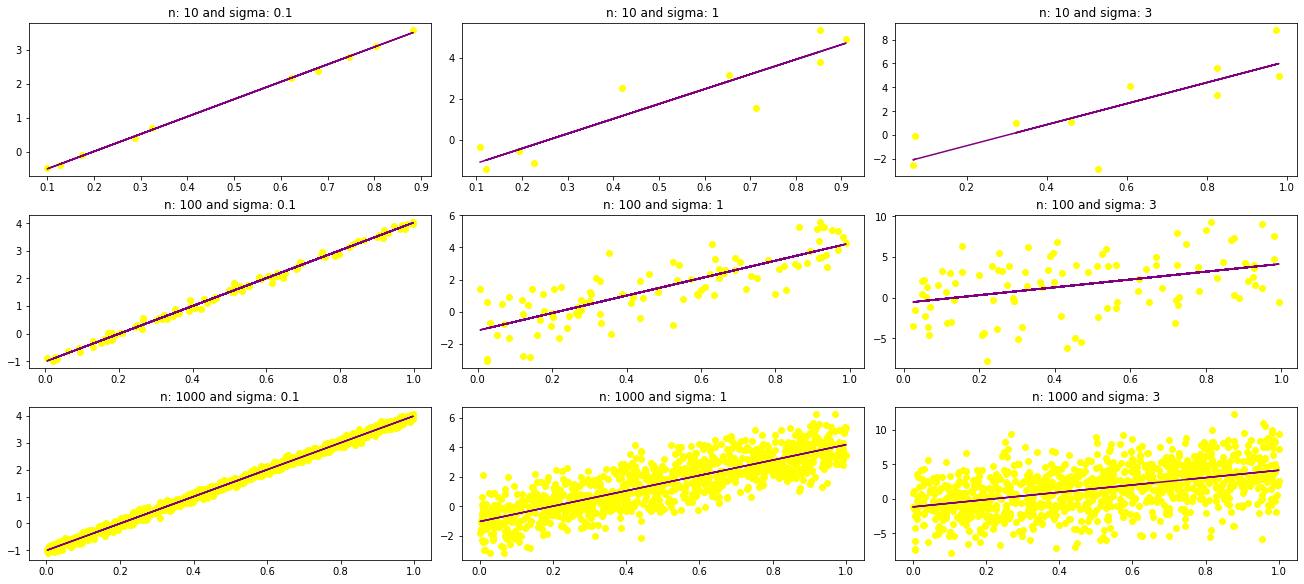

In [131]:
predict = np.array([0.2, 2, 25])

ns = [10, 100, 1000]
sigma = [0.1, 1, 3]

a = 5
b = -1

fig, ax = plt.subplots(len(ns), 3, figsize=(18, 8), constrained_layout=True)

for i, n in enumerate(ns):
    for j, sig in enumerate(sigma):
        eps = np.random.normal(0, sig, n)
        X = np.random.uniform(0, 1, n)

        Y = a*X + b + eps

        Liner = LinearRegression().fit(X.reshape(-1,1), Y)
        #print('sec:', Liner.score(X.reshape(-1,1), Y))
        print(f"n: {n} and sigma: {sig}")
        print('Коэффициенты модели:', Liner.coef_)
        
        print('Свободный член:', Liner.intercept_)

        print('Предсказания: ', Liner.coef_*predict + Liner.intercept_)
        
        print()
        
        ax[i, j].scatter(X, Y, color='yellow')
        linear_reg = X*Liner.coef_ + Liner.intercept_
        ax[i, j].plot(X, linear_reg, color='purple');
        ax[i, j].set_title(f"n: {n} and sigma: {sig}")

In [154]:
n = 100
m = 3

sigma = 1

X = np.random.uniform(0, 1, n)
X_sup = np.zeros((n, m))

for i, k in enumerate([0, 1, 3]):
    X_sup[:, i] = X**k

eps = np.random.normal(0, sigma, n)

a = 5*np.ones(m).reshape(m, 1)

Y = np.matmul(X_sup, a).reshape(n)
    
Y += eps

Parameters
sec: 0.9021986415406086
Коэффициенты модели: [0.         5.42138585 5.03970589]
Свободный член: 4.655207470532822


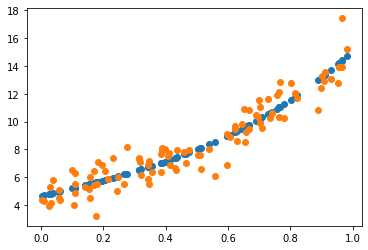

In [155]:
Liner = LinearRegression().fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new = np.matmul(X_sup, a) + b

plt.scatter(X, Y_new)
plt.scatter(X, Y)

<h1>NORM</h1>

In [156]:
max(abs(Y_new - Y))

3.0471941574131023

In [157]:
(abs(Y_new - Y)**2).mean()

0.8684824770061559

In [134]:
xs = np.linspace(0, 1, 1000)

x_sup = np.zeros((1000, m))
for k in range(m):
    x_sup[:, k] = xs**k
    
a_p = np.array(Liner.coef_)
b_p = Liner.intercept_

Y_p = np.matmul(x_sup, a_p) + b_p

a = m*np.ones(m).reshape(m, 1)

Y = np.matmul(x_sup, a).reshape(1000)

max(abs(Y_p - Y))

5.729468302197176

In [159]:
df2 = pd.DataFrame(X_sup)
df2.corr()

,0,1,2
0,NaN,NaN,NaN
1,NaN,1.000000,0.910649
2,NaN,0.910649,1.000000
